### Импорты

In [80]:
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, Birch
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, homogeneity_score, completeness_score, v_measure_score, silhouette_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### Загружаем датасет вина

In [81]:
wine = load_wine()
df=pd.DataFrame(data=np.c_[wine['data'],wine['target']],columns=wine['feature_names']+['target'])

In [82]:
x = df.drop('target', axis=1)
y = df['target']

In [83]:
def pca_drawer(x_train, y_train, centers=None):
    pca = PCA(2)
    data = pca.fit_transform(x_train)
    plt.figure(figsize=(7,7))
    plt.scatter(data[:, 0], data[:, 1], c=y_train)
    if centers is not None:
        centers = pca.transform(centers)
        plt.scatter(centers[:, 0], centers[:, 1],
                   c=np.arange(centers.shape[0]), marker="+", s=600)
    plt.xlabel('Первая главная компонента')
    plt.ylabel('Вторая главная компонента')
    plt.show()

### Выведем датасет с использованием PCA

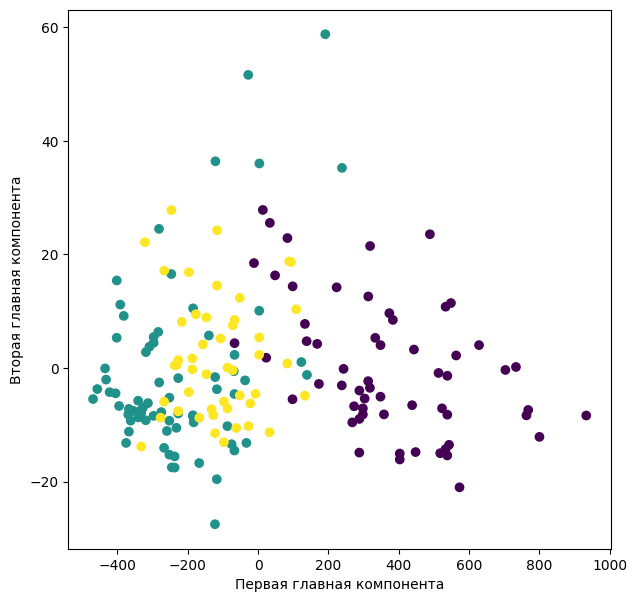

In [84]:
pca_drawer(x, y)

In [85]:
def elbow(x, y):
    plt.figure(figsize=(5,5))
    plt.plot(x, y, "gx-")
    plt.xlabel("K")
    plt.ylabel("Score")
    plt.title("Метод локтя")
    plt.show()

In [86]:
def scorer(x, y, y_pred):
    y_count = sum(y == pd.Series(y_pred))
    return pd.DataFrame({
        'Adjusted Rand index': [adjusted_rand_score(y, y_pred)],
        'Adjusted Mutual Information': [adjusted_mutual_info_score(y, y_pred)],
        'Homogeneity': [homogeneity_score(y, y_pred)],
        'completeness': [completeness_score(y, y_pred)],
        'V-measure': [v_measure_score(y, y_pred)],
        'Silhouette_score': [silhouette_score(x, y_pred)],
        'Кол-во попаданий': y_count,
        'Кол-во не попаданий': len(y) - y_count,
    })

In [93]:
km = KMeans(n_clusters=3,
            random_state=0
           ).fit(x)
y_pred = km.labels_

### Применим KMeans с использованием числа кластеров равным 3

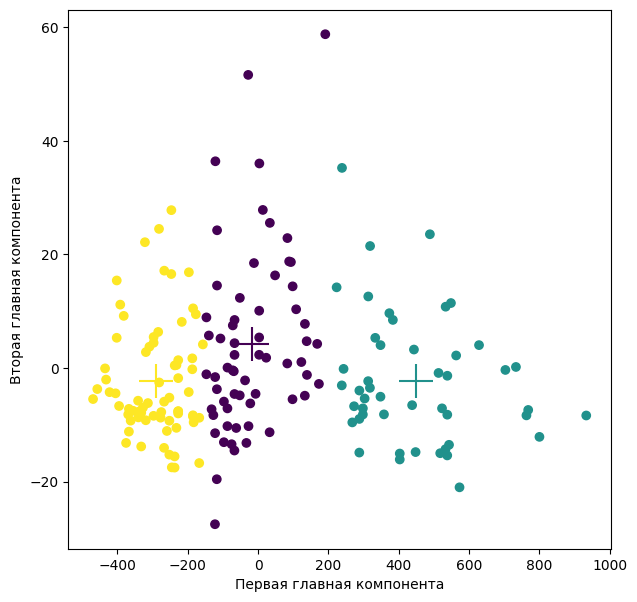

,Adjusted Rand index,Adjusted Mutual Information,Homogeneity,completeness,V-measure,Silhouette_score,Кол-во попаданий,Кол-во не попаданий
0,0.371114,0.422687,0.428812,0.428701,0.428757,0.571138,33,145


In [94]:
pca_drawer(x, y_pred, km.cluster_centers_)
scorer(x, y, y_pred)

### Используем метод локтя

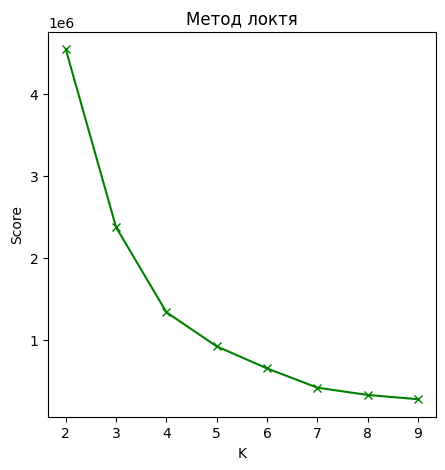

In [89]:
squares = []
for k in range(2, 10):
    km = KMeans(n_clusters=k).fit(x)
    squares.append(km.inertia_)

elbow(range(2, 10), squares)

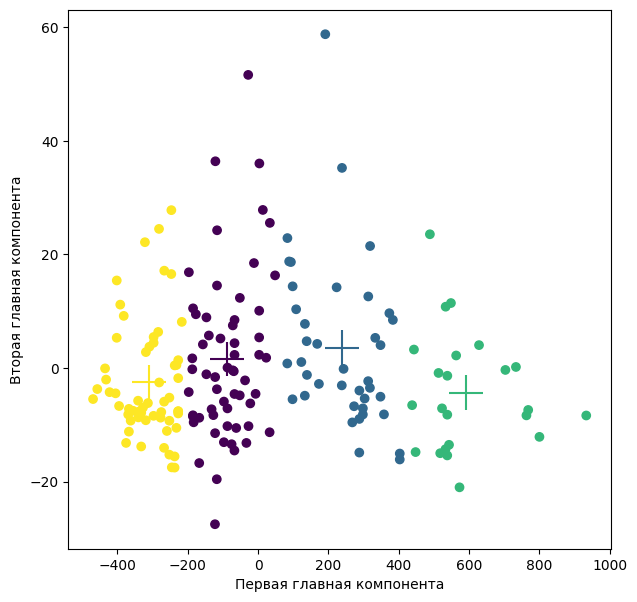

,Adjusted Rand index,Adjusted Mutual Information,Homogeneity,completeness,V-measure,Silhouette_score,Кол-во попаданий,Кол-во не попаданий
0,0.302897,0.36972,0.420875,0.344265,0.378735,0.560594,10,168


In [95]:
km = KMeans(
    n_clusters=4
).fit(x)
y_pred = km.labels_
pca_drawer(x, y_pred, km.cluster_centers_)
scorer(x, y, y_pred)

### Birch

In [91]:
threshold_values = [0.1, 0.5, 1]
branching_factor_values = [2, 5, 10, 25, 50, 100, 200]

best_cluster_num = 0
best_threshold = 0
best_branching_factor = 0
best_silhouette_score = -1
best_model = None

for threshold in threshold_values:
    for branching_factor in branching_factor_values:
        birch = Birch(threshold=threshold, branching_factor=branching_factor)
        birch.fit(x)
        labels = birch.labels_
        cluster_num = len(np.unique(labels))
        silhouette_score_ = silhouette_score(x, labels)
        if silhouette_score_ > best_silhouette_score:
            best_silhouette_score = silhouette_score_
            best_cluster_num = cluster_num
            best_threshold = threshold
            best_branching_factor = branching_factor
            best_model = birch

print(f"Best cluster num: {best_cluster_num}")
print(f"Best threshold: {best_threshold}")
print(f"Best branching factor: {best_branching_factor}")
print(f"Best silhouette score: {best_silhouette_score}")
y_pred = best_model.labels_

Best cluster num: 3
Best threshold: 0.1
Best branching factor: 2
Best silhouette score: 0.5644796401732068


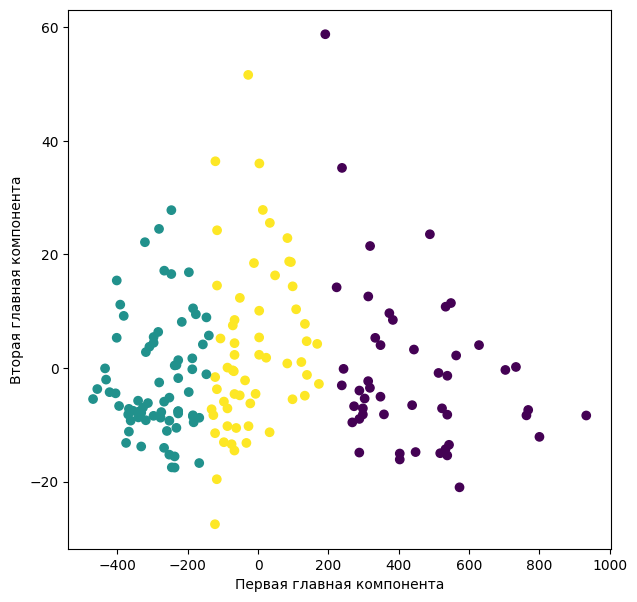

,Adjusted Rand index,Adjusted Mutual Information,Homogeneity,completeness,V-measure,Silhouette_score,Кол-во попаданий,Кол-во не попаданий
0,0.368402,0.409868,0.415861,0.416293,0.416077,0.56448,124,54


In [92]:
pca_drawer(x, y_pred)
scorer(x, y, y_pred)